
### Local binary pattern Algorithm implemention using python

Local binary pattern is a descriptor used to recognize the textures or for object 
detection in images.

LBP step:

1 First all, convert image in grayscale space.

2 For each pixel(gp) in the image, select the P neighborhoods that surround the
central pixel. The coordinates of gp are given by (gc_i - Rsin(2πp/P),gc_j + Rcos(2πp/P))

3 Take the center pixel (gc) and set it as a threshold for its P neighbors.

4 Set to 1 if the value of the adjacent pixel is greater than or equal 
    to the value of the center pixel, 0 otherwise.

5 And compute the lbp value using flowing formula :
    lbp(gc_i, gc_j) = sum(s(gp - gc)*2**p) for p in range(0, P).
    s(x) = 0 if x<0 else 1 


The following images for more detail.

LBP computing examples.

![Drag Racing](./images/lbp_example.png)

LBP raduis and neighbords examples

![Drag Racing](./images/lbp_r_p.png)



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

In [3]:
"""
    this function compute lbp value for  pixel img [x, y] in image img and return it.
    raduis parametter is the raduis of the circle, it set 1 for default in main funtion.
    neighbords parametter is number of neighbords.
    pi2 are used just for time complexity.
"""
def get_pixel_val(img,  x, y, raduis, neighbords, pi2):

    val = 0
    gc = img[x, y]

    try:
        for p in range(neighbords):
            bin_val = 0 if img[round(x - raduis*math.sin(pi2*p/neighbords)), round(y + math.cos(pi2*p/neighbords))] < gc else 1
            val += 2**p*bin_val
    except:
        pass
    return val

def local_binary_pattern(img, raduis=1, neighbords = 8):
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # convert image to grayscale space
    lbp = np.zeros_like(gray_img) # create a matrix like gray_img but all value in this matrix is 0
    pi2 = 2*math.pi # is 2π
    for i in range(gray_img.shape[0]):
        for j in range(gray_img.shape[1]):
            # call get_pixel_val function to compute lbp value and put it in lbp matrix.
            lbp[i][j] = get_pixel_val(gray_img, i, j, raduis, neighbords, pi2)  
    return lbp

In [4]:
img = cv2.imread('./images/cs.jpg')

In [5]:
lbp_img = local_binary_pattern(img)
lbp_img2 = local_binary_pattern(img, 1, 4)
lbp_img3 = local_binary_pattern(img, 2, 16)

C:\Users\cs\AppData\Local\Temp\ipykernel_15420\732002533.py:27: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 65281 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  lbp[i][j] = get_pixel_val(gray_img, i, j, raduis, neighbords, pi2)
C:\Users\cs\AppData\Local\Temp\ipykernel_15420\732002533.py:27: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 65479 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  lbp[i][j] = get_pixel_val(gray_img, i, j, raduis, neighbords, pi2)
C:\Users\cs\AppData\Local\Temp\ipykernel_15420\732002533.py:27: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer array

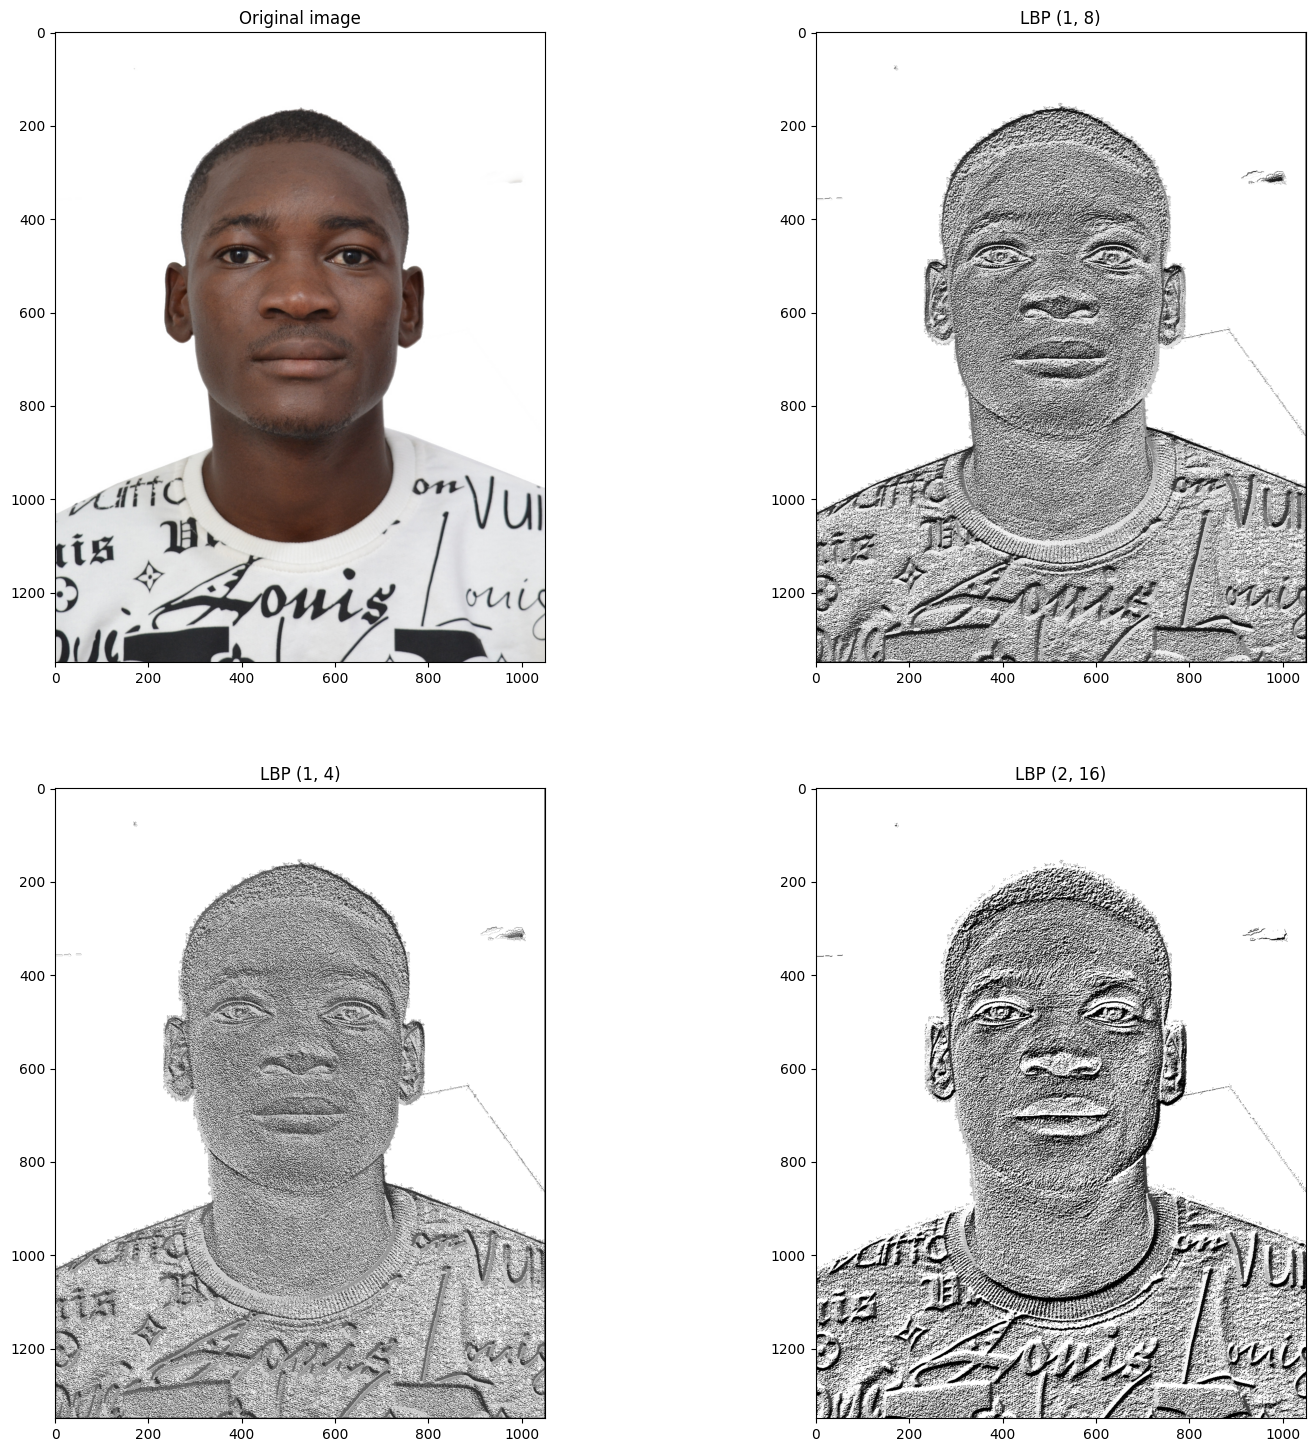

In [6]:
plt.figure(figsize=(18, 18))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.title('Original image')
plt.subplot(2, 2, 2,)
plt.imshow(lbp_img, cmap='gray')
plt.title('LBP (1, 8)')
plt.subplot(2, 2, 3)
plt.imshow(lbp_img2, cmap='gray')
plt.title('LBP (1, 4)')
plt.subplot(2, 2, 4)
plt.imshow(lbp_img3, cmap='gray')
plt.title('LBP (2, 16)')
plt.show()

That's just a basic lbp implementation. there are some other variants of this algorithm like clbp, ltp and more.

### Please for my english !